<a href="https://colab.research.google.com/github/programmerChris3005/DAT512/blob/main/Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#set project id code from bigquery project id
project_id = 'project-2-384223'

In [4]:
#package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# this is the process for importing the data from your Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = "/content/eCommerceAnalysis.xlsx"

users=pd.read_excel(path,header=0)

users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,Number of Items,Returned Goods,Full Name,Spend
0,29954,Jorge,Butler,jorgebutler@example.org,31,M,Mie,84128 Nathan Stravenue Suite 493,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2021-01-07 04:11:00,0,NaN,Jorge Butler,36.0
1,14575,Logan,Stevens,loganstevens@example.org,58,M,Acre,38624 Osborn Via Suite 892,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-02-06 04:41:00,1,No,Logan Stevens,0.0
2,17179,Jennifer,White,jenniferwhite@example.com,58,F,Acre,685 Herrera Summit,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-10-04 16:56:00,0,NaN,Jennifer White,0.0
3,53435,Carly,Reed,carlyreed@example.net,13,F,Acre,30680 Golden Mall Suite 785,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Organic,2022-07-01 16:03:00,0,NaN,Carly Reed,0.0
4,59808,Timothy,Nelson,timothynelson@example.org,26,M,Acre,1552 Peterson Mission Apt. 541,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2023-04-29 18:35:00,0,NaN,Timothy Nelson,0.0


In [61]:
path = "/content/eCommerceAnalysis.xlsx"

users=pd.read_excel(path,'users')
products=pd.read_excel(path,'products')
orders=pd.read_excel(path,'orders')
orderItems=pd.read_excel(path,'order_items')
inventoryItems=pd.read_excel(path,'inventory_items')
events=pd.read_excel(path,'events',header=1)
distro=pd.read_excel(path,'distribution_centers',header=1)



distro.head()

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667


In [8]:
# Bring data from BigQuery

In [6]:
'''
 1) Evaluation of PRODUCTS, ANALYZING PRODUCT SALES, and PRODUCT WEB VIEWS,
 and a justified recommendation on cutting 20% of products from the store, listing the products to remove.

'''

'\n 1) Evaluation of PRODUCTS, ANALYZING PRODUCT SALES, and PRODUCT WEB VIEWS,\n and a justified recommendation on cutting 20% of products from the store, listing the products to remove.\n\n'

In [ ]:
sqlEvents = '''
SELECT
*
FROM
  `bigquery-public-data.thelook_ecommerce.products`
'''
products = pd.io.gbq.read_gbq(sqlEvents,project_id=project_id,
                                      index_col='id')

In [7]:
products.head()

,cost,category,name,brand,retail_price,department,sku,distribution_center_id
id,,,,,,,,
27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1


In [8]:
products.value_counts()

cost        category           name                                                          brand                retail_price  department  sku                               distribution_center_id
0.008300    Accessories        Indestructable Aluminum Aluma Wallet - RED                    marshal              0.020000      Women       8425BC94A44E3D1BB3C8C026B2702C00  1                         1
28.183141   Outerwear & Coats  Patty Women Black Motorcycle Biker Zip Front Jacket           Patty                57.990002     Women       E3D11D85DEAF57A720D252CD069BCD37  1                         1
28.246000   Pants              Dockers Men's 5 Pocket Khaki D2 Straight Fit Flat Front Pant  Dockers              58.000000     Men         A45914689D19E8E8F32CF648B70B1152  7                         1
            Intimates          Only Hearts Delicious Lace Trim Long Cami (44078)             Only Hearts          58.000000     Women       6684828461F4E5BDA1E2A33B5E0DB6D3  1                      

In [9]:
#Product Name and Price chart

In [10]:
productCost = products[['name','retail_price']]

In [11]:
print(productCost)

                                                    name  retail_price
id                                                                    
27569     2XU Men's Swimmers Compression Long Sleeve Top    150.410004
27445         TYR Sport Men's Square Leg Short Swim Suit     38.990002
27457    TYR Sport Men's Solid Durafast Jammer Swim Suit     27.600000
27466  TYR Sport Men's Swim Short/Resistance Short Sw...     30.000000
27481                    TYR Alliance Team Splice Jammer     45.950001
...                                                  ...           ...
1993   Comfort Colors C1598 Womens Full-Zip Hooded Fl...     52.119999
2062   Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...     39.860001
2308   Comfort Colors by Chouinard Women's Drawstring...     18.020000
1852   DV by Dolce Vita Women's Larisa Hooded Sweatshirt     34.520000
2296     Independent Trading Co Deluxe Fleece Zip Hoodie     36.990002

[29120 rows x 2 columns]


<Axes: xlabel='name'>

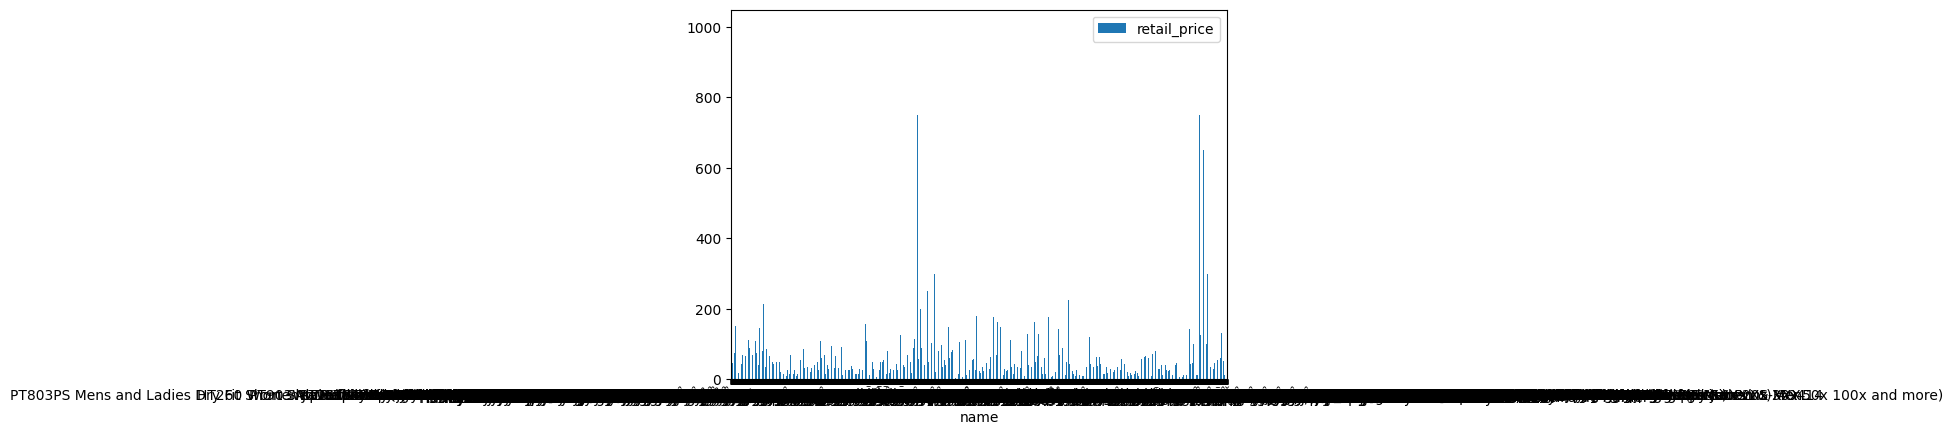

In [12]:
productCost.plot.bar(x='name',y='retail_price', rot=0)

In [13]:
# import the order_items data

In [14]:
sqlEvents = '''
SELECT
*
FROM
  `bigquery-public-data.thelook_ecommerce.order_items`
'''
orderItems = pd.io.gbq.read_gbq(sqlEvents,project_id=project_id,
                                      index_col='id')

In [15]:
orderItems.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
id,,,,,,,,,,
67765,46792,37642,13606,183006,Shipped,2022-04-19 13:02:06+00:00,2022-04-21 23:20:00+00:00,NaT,NaT,2.5
80831,55833,44844,13606,218250,Complete,2022-09-28 14:05:49+00:00,2022-10-01 04:23:00+00:00,2022-10-04 13:35:00+00:00,NaT,2.5
26794,18522,14936,13606,72435,Cancelled,2022-03-24 10:18:50+00:00,NaT,NaT,NaT,2.5
46129,31785,25695,13606,124584,Cancelled,2021-09-17 22:16:28+00:00,NaT,NaT,NaT,2.5
40286,27784,22404,13606,108894,Processing,2022-08-25 04:05:42+00:00,NaT,NaT,NaT,2.5


In [16]:
sqlEvents = '''
SELECT

  id,
  name
FROM
  `bigquery-public-data.thelook_ecommerce.products`;
  '''
productsSQL = pd.io.gbq.read_gbq(sqlEvents,project_id=project_id,
                                      index_col='id')

In [17]:
productsSQL.head()

,name
id,
27569,2XU Men's Swimmers Compression Long Sleeve Top
27445,TYR Sport Men's Square Leg Short Swim Suit
27457,TYR Sport Men's Solid Durafast Jammer Swim Suit
27466,TYR Sport Men's Swim Short/Resistance Short Sw...
27481,TYR Alliance Team Splice Jammer


In [18]:
# want to combine the ID, Name & the Sales_Price

In [19]:
#check and see what we're working with here
orderItems.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
id,,,,,,,,,,
67765,46792,37642,13606,183006,Shipped,2022-04-19 13:02:06+00:00,2022-04-21 23:20:00+00:00,NaT,NaT,2.5
80831,55833,44844,13606,218250,Complete,2022-09-28 14:05:49+00:00,2022-10-01 04:23:00+00:00,2022-10-04 13:35:00+00:00,NaT,2.5
26794,18522,14936,13606,72435,Cancelled,2022-03-24 10:18:50+00:00,NaT,NaT,NaT,2.5
46129,31785,25695,13606,124584,Cancelled,2021-09-17 22:16:28+00:00,NaT,NaT,NaT,2.5
40286,27784,22404,13606,108894,Processing,2022-08-25 04:05:42+00:00,NaT,NaT,NaT,2.5


In [20]:
#ID and SalesPrice in seperate chart

salespriceID = orderItems.iloc[:,9]

In [21]:
salespriceID.head()

id
67765    2.5
80831    2.5
26794    2.5
46129    2.5
40286    2.5
Name: sale_price, dtype: float64

In [22]:
#adding column names to the respective columns

In [23]:
salespriceID.columns=['id','sale_price']

In [24]:
#checking to see if naming works
print(salespriceID)

id
67765     2.50
80831     2.50
26794     2.50
46129     2.50
40286     2.50
          ... 
86163     9.82
36426     9.82
41589     9.82
59123     9.82
126156    9.82
Name: sale_price, Length: 181349, dtype: float64


In [25]:
#use the concat function to combine these two tables togehter

In [26]:
frames = [salespriceID,productCost]
result = pd.concat(frames)

In [27]:
print(result)

         0                                               name  retail_price
id                                                                         
67765  2.5                                                NaN           NaN
80831  2.5                                                NaN           NaN
26794  2.5                                                NaN           NaN
46129  2.5                                                NaN           NaN
40286  2.5                                                NaN           NaN
...    ...                                                ...           ...
1993   NaN  Comfort Colors C1598 Womens Full-Zip Hooded Fl...     52.119999
2062   NaN  Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...     39.860001
2308   NaN  Comfort Colors by Chouinard Women's Drawstring...     18.020000
1852   NaN  DV by Dolce Vita Women's Larisa Hooded Sweatshirt     34.520000
2296   NaN    Independent Trading Co Deluxe Fleece Zip Hoodie     36.990002

[210469 row

In [28]:
result.columns = ['sales_price','name','retail_price']

In [29]:
result.head()

,sales_price,name,retail_price
id,,,
67765,2.5,NaN,NaN
80831,2.5,NaN,NaN
26794,2.5,NaN,NaN
46129,2.5,NaN,NaN
40286,2.5,NaN,NaN


In [30]:
result.sort_values(by=['sales_price']).head(5)

,sales_price,name,retail_price
id,,,
60163,0.02,NaN,NaN
12953,0.02,NaN,NaN
86143,0.02,NaN,NaN
84043,0.02,NaN,NaN
76605,0.02,NaN,NaN


In [31]:
#view without the NaN, 0s ^ Nulls --- Come Back TO THIS

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# this is the process for importing the data from your Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Analysis on Users*

In [12]:
#taking a look at the users table 
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,Number of Items,Returned Goods,Full Name,Spend
0,29954,Jorge,Butler,jorgebutler@example.org,31,M,Mie,84128 Nathan Stravenue Suite 493,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2021-01-07 04:11:00,0,NaN,Jorge Butler,36.0
1,14575,Logan,Stevens,loganstevens@example.org,58,M,Acre,38624 Osborn Via Suite 892,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-02-06 04:41:00,1,No,Logan Stevens,0.0
2,17179,Jennifer,White,jenniferwhite@example.com,58,F,Acre,685 Herrera Summit,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-10-04 16:56:00,0,NaN,Jennifer White,0.0
3,53435,Carly,Reed,carlyreed@example.net,13,F,Acre,30680 Golden Mall Suite 785,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Organic,2022-07-01 16:03:00,0,NaN,Carly Reed,0.0
4,59808,Timothy,Nelson,timothynelson@example.org,26,M,Acre,1552 Peterson Mission Apt. 541,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2023-04-29 18:35:00,0,NaN,Timothy Nelson,0.0


In [13]:
# pulling in the locations columns to see where are customers are located

locations = users[["Full Name","country","latitude","longitude"]]
locations.head()

,Full Name,country,latitude,longitude
0,Jorge Butler,Japan,34.851814,136.508713
1,Logan Stevens,Brasil,-9.945568,-67.835610
2,Jennifer White,Brasil,-9.945568,-67.835610
3,Carly Reed,Brasil,-9.945568,-67.835610
4,Timothy Nelson,Brasil,-9.945568,-67.835610


In [14]:
# lets extend the list to include the Spend of each of the users
locations = users[["Full Name","country","latitude","longitude","Spend"]]
locations.head()

,Full Name,country,latitude,longitude,Spend
0,Jorge Butler,Japan,34.851814,136.508713,36.0
1,Logan Stevens,Brasil,-9.945568,-67.835610,0.0
2,Jennifer White,Brasil,-9.945568,-67.835610,0.0
3,Carly Reed,Brasil,-9.945568,-67.835610,0.0
4,Timothy Nelson,Brasil,-9.945568,-67.835610,0.0


## What are the top 5 countries with the highest amount of users?

In [15]:
highUsers = users['country'].value_counts()
highUsers.head()

China            10192
United States     5343
Brasil            4470
South Korea       1969
Japan             1663
Name: country, dtype: int64

### Judging by the counts, China has the most consumers followed by the US, Brazil, South Korea and Japan

In [16]:
#installing packages

In [17]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
pip install plotly_express==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
pip show plotly

Name: plotly
Version: 5.14.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, datascience, plotly-express


In [18]:
#import the goodies
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

<Axes: xlabel='longitude', ylabel='latitude'>

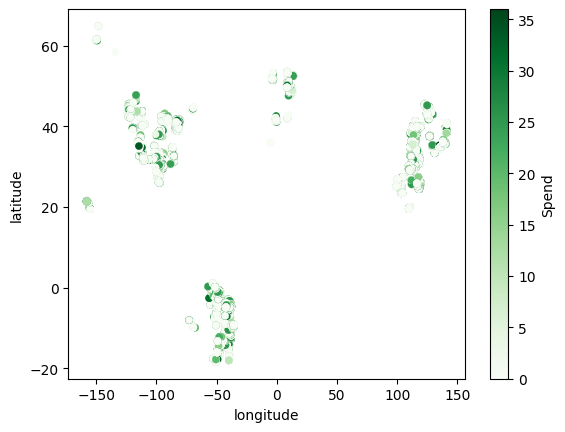

In [19]:
#now lets create a scatter plot that shows us a heatmap of users and spend on a map
 
locations.plot(x="longitude",y="latitude", kind="scatter",c="Spend",colormap="Greens")


In [20]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

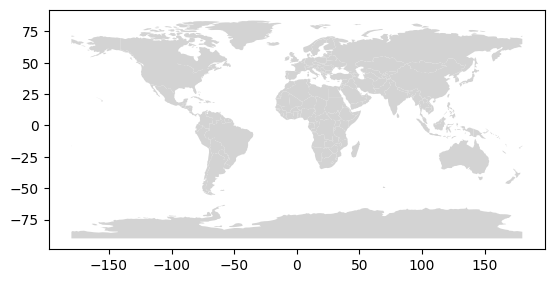

In [21]:
countries.plot(color='lightgrey')

<Axes: >

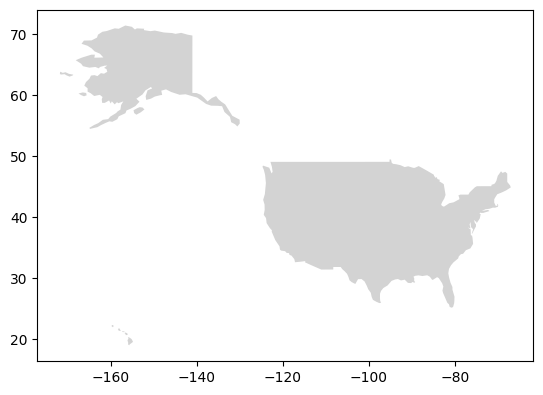

In [22]:
#because we all live in the US, why not magnify that area of the map 
countries[countries["name"] == "United States of America"].plot(color="lightgrey")


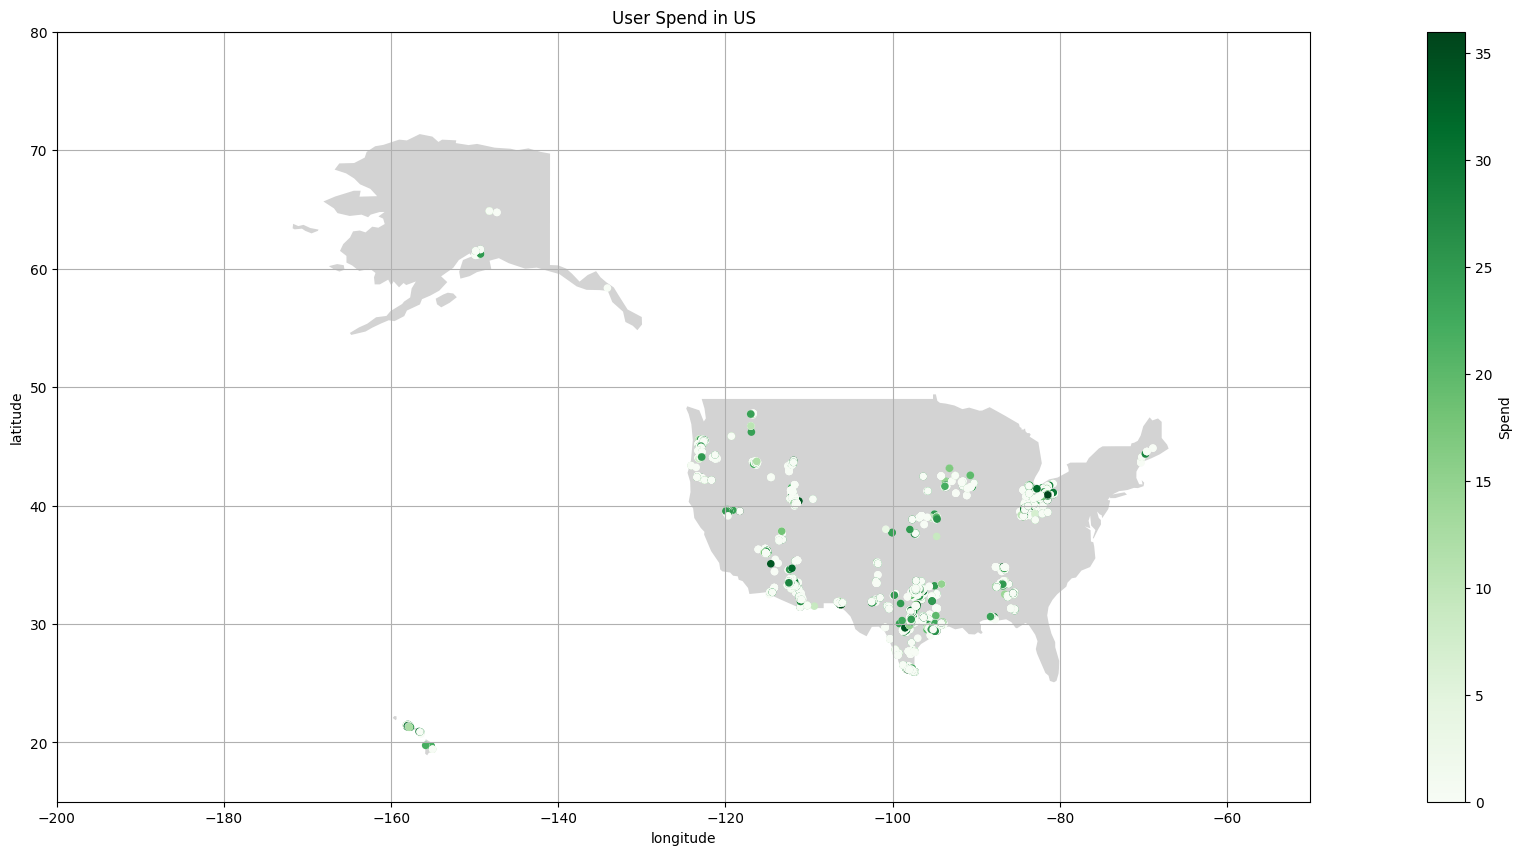

In [23]:
# now to combine two...

# initialize an axis
fig, ax = plt.subplots(figsize=(30,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey",
                                                 ax=ax)
# plot points
locations.plot(x="longitude", y="latitude", kind="scatter", 
        c="Spend", colormap="Greens", 
        title=f"User Spend in US", 
        ax=ax)
# add grid
ax.grid()
plt.xlim([-200,-50])
plt.ylim([15, 80])
plt.show()

### Judging by the map, many of the users are located in the Midwest, South and Pacific Northwest. There is a decent amount of users in the South Pacific (Hawaii) and practically none in Alaska. 

In [24]:
# replicating the same view for China which has the most users 

<Axes: >

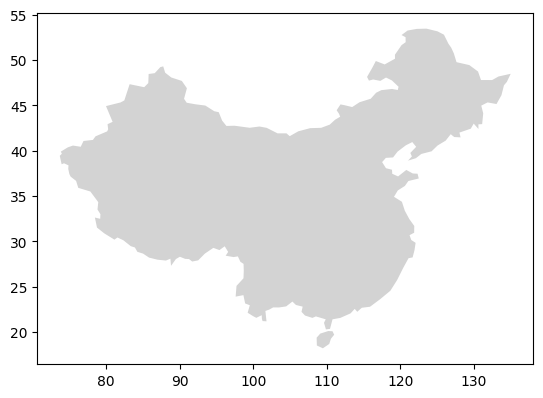

In [25]:
countries[countries["name"] == "China"].plot(color="lightgrey")

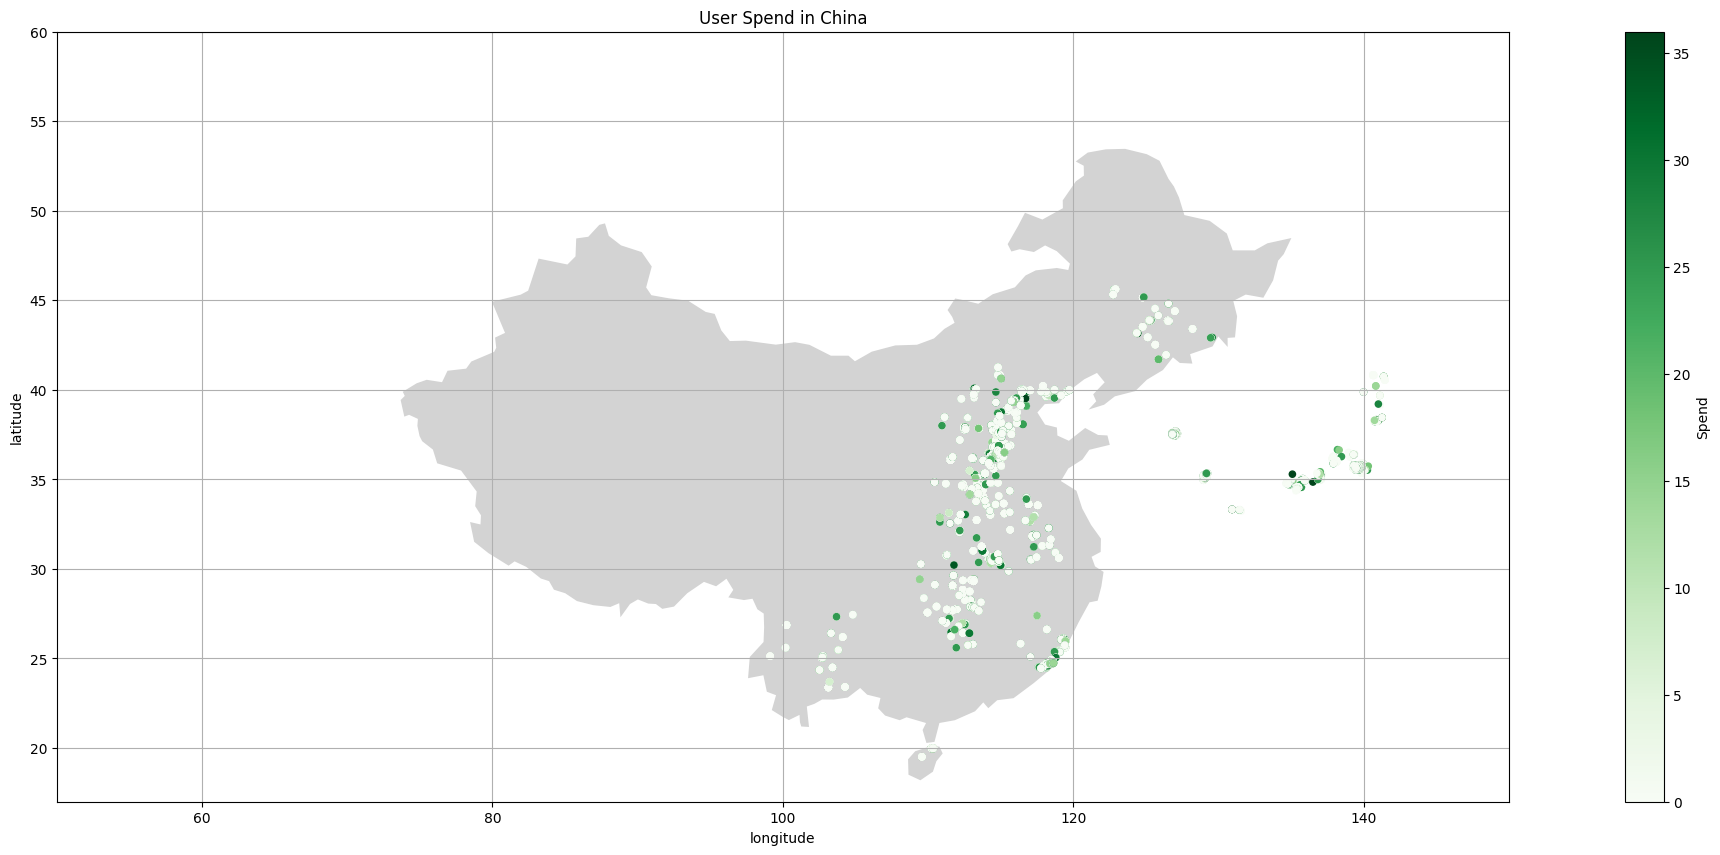

In [26]:
# now to combine two...

# initialize an axis
fig, ax = plt.subplots(figsize=(30,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "China"].plot(color="lightgrey",
                                                 ax=ax)
# plot points
locations.plot(x="longitude", y="latitude", kind="scatter", 
        c="Spend", colormap="Greens", 
        title=f"User Spend in China", 
        ax=ax)
# add grid
ax.grid()
plt.xlim([50,150])
plt.ylim([17, 60])
plt.show()

### Many users hail from Eastern China with some in the southern region

### Gender Breakdown

In [27]:
# create a table that pulls in the users name and their gender
gender = users[['first_name','last_name','gender']]
gender.head()

,first_name,last_name,gender
0,Jorge,Butler,M
1,Logan,Stevens,M
2,Jennifer,White,F
3,Carly,Reed,F
4,Timothy,Nelson,M


In [28]:
genderCount = gender['gender'].value_counts()
genderCount.head()

F    12514
M    12486
Name: gender, dtype: int64

In [29]:
femaleCount=sum(gender.gender =="F")

In [30]:
maleCount=sum(gender.gender =="M")

In [31]:
total = maleCount + femaleCount

### User gender seems to be evenly split between Male and Female



In [32]:
#female percentage
print(femaleCount/total,"%")

0.50056 %


In [33]:
#male percentage

print(maleCount/total,"%")

0.49944 %


### #Look into the average number of items purchased, spend by consumers, and number of returns

---



In [34]:
# show the average spend and qty

In [35]:
for i in range(len(users)):
  if i >= 1:
    averageItems = users['Number of Items'].mean()
print(averageItems)


0.25264


In [36]:
averageSpend = users['Spend'].mean()

In [37]:
print(f'The average number of items purchased by consumers is {averageItems}. The avg spend by consumers is {averageSpend}')

The average number of items purchased by consumers is 0.25264. The avg spend by consumers is 5.67154


In [38]:
# create a table with  name and number of returned goods
returners = users[["first_name","last_name","Returned Goods"]]
returners.head()

,first_name,last_name,Returned Goods
0,Jorge,Butler,NaN
1,Logan,Stevens,No
2,Jennifer,White,NaN
3,Carly,Reed,NaN
4,Timothy,Nelson,NaN


In [39]:
returned = returners['Returned Goods'].value_counts()
returned.head()

No     4825
Yes     527
Name: Returned Goods, dtype: int64

### Looking into the value counts for the nummber of returned and un-returned products, only 10% of the items were returned

## Users into Categories




## Categorizing the users into different segments is very beneficial when it comes to data organization but also for the opportunities for the business. For example, segmenting users by gender allows us to understand the buying behaviour of male and females. Filtering on gender, we can understand the products preffered and target male and or female consumers with offerings on such items. Another segmentation we can use is based on location. Culture differs per country and so does buying behavior. By segmenting based on location, we can offer limited products targeted to consumers who spend more but also indulge certain products realtive to others because of location factors. 

## Analysis on *Products*

In [40]:
#what does the table look like?
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,margin,Margin %,Distribution Center City
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1,57.757441,0.623377,Memphis TN
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1,14.270340,0.577287,Memphis TN
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1,11.702400,0.736111,Memphis TN
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1,12.150000,0.680672,Memphis TN
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1,16.542000,0.562500,Memphis TN


In [41]:
#margin seems to be an interesting metric
breakEven = products[["name","cost","retail_price"]]
breakEven.head()

,name,cost,retail_price
0,2XU Men's Swimmers Compression Long Sleeve Top,92.652563,150.410004
1,TYR Sport Men's Square Leg Short Swim Suit,24.719661,38.990002
2,TYR Sport Men's Solid Durafast Jammer Swim Suit,15.897600,27.600000
3,TYR Sport Men's Swim Short/Resistance Short Sw...,17.850000,30.000000
4,TYR Alliance Team Splice Jammer,29.408001,45.950001


In [42]:
breakEven = products[["name","cost","retail_price","margin"]]
breakEven.head()

,name,cost,retail_price,margin
0,2XU Men's Swimmers Compression Long Sleeve Top,92.652563,150.410004,57.757441
1,TYR Sport Men's Square Leg Short Swim Suit,24.719661,38.990002,14.270340
2,TYR Sport Men's Solid Durafast Jammer Swim Suit,15.897600,27.600000,11.702400
3,TYR Sport Men's Swim Short/Resistance Short Sw...,17.850000,30.000000,12.150000
4,TYR Alliance Team Splice Jammer,29.408001,45.950001,16.542000


In [43]:

print(breakEven["margin"].max())



594.4049987999999


Although every sale is good, ideally we really wanna shift consumers to the high margin items such as the exclusive North Face jackets, Norbis & Darla coats. Margin is around 150% which is great. But... the issue is the retail price. Majority of customers aren't opting for luxury tiered items like an $1,000 coat. This is something we may want to revisit.

### Product Sales

In [44]:
#products table
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,margin,Margin %,Distribution Center City
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1,57.757441,0.623377,Memphis TN
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1,14.270340,0.577287,Memphis TN
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1,11.702400,0.736111,Memphis TN
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1,12.150000,0.680672,Memphis TN
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1,16.542000,0.562500,Memphis TN


In [45]:
orderItems.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price (Revenue),User Name,Returned?,Gender,Product,Category,Revenue
0,8282,5775,4614,13606,22181,Shipped,2023-04-06 23:26:45,2023-04-07 05:05:00,NaT,NaT,2.5,Michelle Bean,No,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Accessories,NaN
1,42882,29368,23535,13606,115348,Complete,2022-09-11 20:42:54,2022-09-14 04:16:00,2022-09-16 18:24:00,NaT,2.5,NaN,No,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Accessories,NaN
2,67319,46297,37005,13606,181299,Complete,2020-09-26 00:59:52,2020-09-28 15:12:00,2020-09-29 03:05:00,NaT,2.5,NaN,No,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Accessories,NaN
3,59344,40792,32590,13606,159833,Cancelled,2023-03-04 23:18:09,NaT,NaT,NaT,2.5,NaN,No,M,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Accessories,NaN
4,103882,71321,56827,13606,279773,Processing,2022-11-21 05:59:20,NaT,NaT,NaT,2.5,NaN,No,M,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Accessories,NaN


In [46]:
sales = orderItems[['Product',"sale_price (Revenue)"]]
sales.head()

,Product,sale_price (Revenue)
0,Elegant PASHMINA SCARF WRAP SHAWL STOLE,2.5
1,Elegant PASHMINA SCARF WRAP SHAWL STOLE,2.5
2,Elegant PASHMINA SCARF WRAP SHAWL STOLE,2.5
3,Elegant PASHMINA SCARF WRAP SHAWL STOLE,2.5
4,Elegant PASHMINA SCARF WRAP SHAWL STOLE,2.5


In [47]:
saleSum = sales['sale_price (Revenue)'].sum()
print(saleSum)

559324.75


In [48]:
print(f'${saleSum}')

$559324.75


### The total sales for the orders placed are $559,324.75


### Looking at sales from a category POV

In [52]:
pieChart = orderItems[['Category','sale_price (Revenue)']]
pieChart.head()

,Category,sale_price (Revenue)
0,Accessories,2.5
1,Accessories,2.5
2,Accessories,2.5
3,Accessories,2.5
4,Accessories,2.5


## Web Views

This could be very valuable information that can be given to Marketing. This will give us insight into how exactly consumers are interacting with advertisements. We'll know what works, what doesnt, what sources are more popular, etc

In [62]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,561895,42792.0,3,faf80c0f-05bf-4f85-a618-3a4fa340e8aa,2021-05-30 01:47:32,217.14.32.254,Bogatynia,Dolnośląskie,59,Other,Email,/cart,cart
1,804651,61158.0,4,17504663-7abd-4fbc-9427-aae82255179e,2022-01-14 13:46:24,62.152.68.192,Bogatynia,Dolnośląskie,59,Chrome,Facebook,/cart,cart
2,1333052,NaN,2,d2acd758-52d3-4686-8c4a-b749de7c1f0a,2021-01-04 13:42:00,187.130.203.94,Bogatynia,Dolnośląskie,59,Chrome,Email,/cart,cart
3,37880,2954.0,3,dcedb32f-9ffd-49f6-a0af-f39243a95f5d,2021-11-26 23:02:17,59.243.105.201,Bogatynia,Dolnośląskie,59,Safari,Email,/cart,cart
4,810209,61609.0,3,a010455b-ef5d-4729-b1f6-8768d5749f55,2020-06-13 05:14:07,130.231.245.250,Bogatynia,Dolnośląskie,59,Safari,Adwords,/cart,cart


In [66]:
# which browser has the most hits?
events.groupby(['browser']).count()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,traffic_source,uri,event_type
browser,,,,,,,,,,,,
Chrome,12579,7290,12579,12579,12579,12579,12477,12579,12579,12579,12579,12579
Firefox,4864,2900,4864,4864,4864,4864,4829,4864,4864,4864,4864,4864
IE,1188,692,1188,1188,1188,1188,1178,1188,1188,1188,1188,1188
Other,1349,793,1349,1349,1349,1349,1340,1349,1349,1349,1349,1349
Safari,5020,2940,5020,5020,5020,5020,4985,5020,5020,5020,5020,5020


### To no suprise, Chrome, which is google is the leading brower when it comes to users event interactions. Google Ads is the leading ad platform and majority of the internets ads are curated through Google

In [68]:
# just for shits and giggles, lets replicate the same view except for the traffic_source column

In [69]:
events.groupby(['traffic_source']).count()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,uri,event_type
traffic_source,,,,,,,,,,,,
Adwords,7433,4319,7433,7433,7433,7433,7380,7433,7433,7433,7433,7433
Email,11287,6600,11287,11287,11287,11287,11203,11287,11287,11287,11287,11287
Facebook,2526,1495,2526,2526,2526,2526,2503,2526,2526,2526,2526,2526
Organic,1242,714,1242,1242,1242,1242,1230,1242,1242,1242,1242,1242
YouTube,2512,1487,2512,2512,2512,2512,2493,2512,2512,2512,2512,2512


Besides email, Adwords is the leading trarffic source. AdWords is a google product for advertisements

## Rationalization -- What to cut from the store

One of the ways we can rationalize our current inventory to free up space for items that perform well is to analyze the different categories.

In [76]:
ordersList = orderItems.groupby(['Category']).count()
ordersList.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price (Revenue),User Name,Returned?,Gender,Product,Revenue
Category,,,,,,,,,,,,,,,,
Accessories,17820,17820,17820,17820,17820,17820,17820,11749,6335,1829,17820,4481,17820,17820,16128,9803
Active,288,288,288,288,288,288,288,199,112,33,288,74,288,288,288,159
Dresses,30,30,30,30,30,30,30,19,13,3,30,6,30,30,30,0
Fashion Hoodies & Sweatshirts,17,17,17,17,17,17,17,9,7,1,17,3,17,17,17,0
Intimates,1637,1637,1637,1637,1637,1637,1637,1081,583,170,1637,444,1637,1637,1637,0


In [82]:
# Items to get rid of
ordersList.nsmallest(3,'sale_price (Revenue)')

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price (Revenue),User Name,Returned?,Gender,Product,Revenue
Category,,,,,,,,,,,,,,,,
Outerwear & Coats,7,7,7,7,7,7,7,3,1,1,7,0,7,7,7,1
Suits & Sport Coats,16,16,16,16,16,16,16,7,4,2,16,4,16,16,16,0
Fashion Hoodies & Sweatshirts,17,17,17,17,17,17,17,9,7,1,17,3,17,17,17,0


### Here we have listed the bottom 3 categories of items in the store. SKUS in these categories will be rationalized to free up space for better performing items. The revenue of these categories overall suports the decision to cut inventory because they make up less thn 1% of the total revenue of sales.